# Assumptions (potiential problems)
 - ath_name == '' means race cancelled (checked for a few of events)
   - correct, afaik
 - ['season', 'venue', 'event', 'date', 'gender'] identify uniquely a race
     - we do not get the same number of races as https://en.wikipedia.org/wiki/FIS_Alpine_Ski_World_Cup
 - ['season', 'event', 'date', 'gender', 'ath_name'] is a unique index for the data frames

In [43]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

In [2]:
def parseCSV(isMale=True):
    gender = 'm' if isMale else 'f'
    df = pd.read_csv(f'../data/wc{gender}.csv')
    df = df.replace(np.nan, '', regex=True)
    df.date = pd.to_datetime(df.date, format='%Y-%m-%d')
    df['gender'] = gender
    return df

In [6]:
def remove_cancelled_race(df):
    return df[df['ath_name']!='']

In [90]:
def number_season(df):
    return len(df['season'].unique())

def number_races(df):
    return len(df[['season', 'venue', 'event','date', 'gender']].drop_duplicates())

def number_athletes(df):
    return len(df['ath_name'].unique())

def number_country(df):
    return len(df['ath_country'].unique())

def number_races_events(df):
    return df[['season', 'venue', 'event','date','gender']].drop_duplicates()[['venue', 'event']].groupby('event').count()

def number_races_years(df):
    return df[['season', 'venue', 'event', 'date', 'gender']].drop_duplicates()[['event','season']].groupby('season').count()
    

In [9]:
def show_basic_stats(df):
    print('# seasons  :', number_season(df))
    print('# races    :', number_races(df))
    print('# athletes :', number_athletes(df))
    print('# country  :', number_country(df))
    print(number_races_events(df))

In [10]:
dfm = remove_cancelled_race(parseCSV())
dff = remove_cancelled_race(parseCSV(False))
both = pd.concat([dfm, dff])
print('-----  World Cup Men -----')
show_basic_stats(dfm)

print('-----  World Cup Women -----')
show_basic_stats(dff)

print('-----  World Cup Women -----')
show_basic_stats(both)

-----  World Cup Men -----
# seasons  : 54
# races    : 1798
# athletes : 1730
# country  : 69
              venue
event              
Combined        134
Downhill        496
Giant Slalom    423
Parallel         24
Slalom          504
Super G         217
-----  World Cup Women -----
# seasons  : 54
# races    : 1680
# athletes : 1407
# country  : 57
              venue
event              
Combined        106
Downhill        417
Giant Slalom    418
Parallel         23
Slalom          478
Super G         238
-----  World Cup Women -----
# seasons  : 54
# races    : 3478
# athletes : 3137
# country  : 77
              venue
event              
Combined        240
Downhill        913
Giant Slalom    841
Parallel         47
Slalom          982
Super G         455


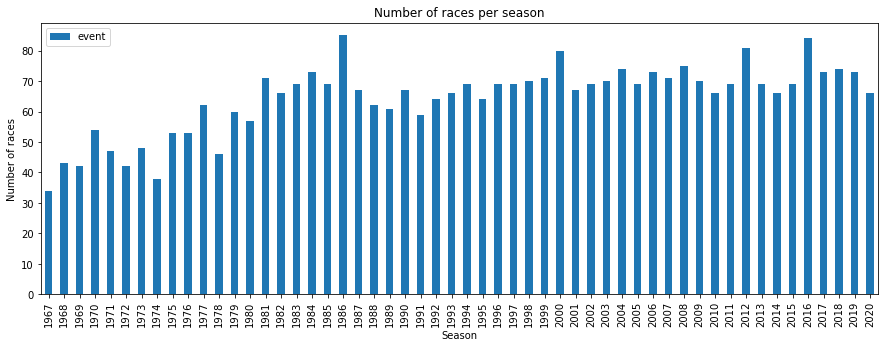

In [115]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
axes = number_races_years(both).plot.bar(ax=axes, title='Number of races per season')
axes.set_xlabel("Season")
axes.set_ylabel("Number of races")
fig.savefig('races_per_year.png')

In [133]:
events = pd.DataFrame(columns=['Downhill','Super G','Giant Slalom','Slalom','Combined','Parallel','decade'])
decades = ["70's", "80's", "90's", "00's", "10's"]

start = 1970 
end = 1980
i = 0
while(end < 2021):
    e = number_races_events(both[(both['season'] >= start) &(both['season'] < end)])
    e = e.transpose().reset_index().drop('index', axis=1)
    e['decade'] = decades[i]
    e.set_index('decade')
    events = pd.concat([events, e])
    start +=10
    end +=10
    i+=1
events = events.set_index('decade')

In [134]:
events

,Downhill,Super G,Giant Slalom,Slalom,Combined,Parallel
decade,,,,,,
70's,147,NaN,158,163,26,9
80's,184,56,152,187,80,21
90's,178,119,153,175,38,5
00's,185,135,163,191,44,NaN
10's,172,133,163,201,47,8


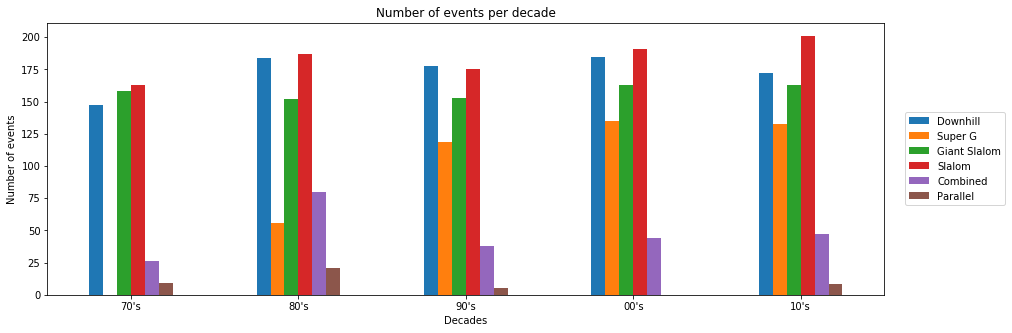

In [161]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
axes = events.plot.bar(ax=axes, title='Number of events per decade',rot=0)
axes.legend(loc="center right",bbox_to_anchor=(1.15, 0.5))
axes.set_xlabel("Decades")
axes.set_ylabel("Number of events")

fig.savefig('events_per_decades.png')

In [156]:
both[both['ath_time_run_1']!=0].sort_values('season')

,season,date,venue,country,event,ath_rank,ath_name,ath_country,ath_time_run_1,ath_time_run_2,ath_time,ath_time_diff,ath_ski,ath_id,gender
15779,1998,1998-01-25,Kitzbuehel,AUT,Slalom,1,Thomas Stangassinger,AUT,105,125,10427,0,,thomas_stangassinger_aut_stnth,m
14839,1998,1998-01-25,Cortina,ITA,Giant Slalom,26,Martina Fortkord,SWE,8278,8118,16396,651,,martina_fortkord_swe_wfrtma,f
14838,1998,1998-01-25,Cortina,ITA,Giant Slalom,25,Annemarie Gerg,GER,8476,7890,16366,621,,annemarie_gerg_ger_wgrgan,f
14837,1998,1998-01-25,Cortina,ITA,Giant Slalom,24,Birgit Heeb-Batliner,LIE,8317,8001,16318,573,,birgit_heeb-batliner_lie_whebbi,f
14836,1998,1998-01-25,Cortina,ITA,Giant Slalom,23,Ainhoa Ibarra Astelarra,SPA,8400,7884,16284,539,,ainhoa_ibarra_astelarra_spa_wibrai,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61807,2020,2020-01-26,Kitzbuehel,AUT,Slalom,20,David Ryding,GBR,113,117,10328,178,Dynastar,david_ryding_gbr_220689,m
61808,2020,2020-01-26,Kitzbuehel,AUT,Slalom,21,Simon Maurberger,ITA,140,91,10329,179,Atomic,simon_maurberger_ita_6291430,m
61809,2020,2020-01-26,Kitzbuehel,AUT,Slalom,22,Atle Lie McGrath,NOR,120,133,10351,201,Head,atlelie_mcgrath_nor_422732,m
61798,2020,2020-01-26,Kitzbuehel,AUT,Slalom,11,Ramon Zenhaeusern,SUI,85,60,10243,93,Rossignol,ramon_zenhaeusern_sui_511902,m


## Corrections

Attention: after parsing, WCM has 2 Kitzbüehl Downhill races on the 1995-01-14. One of them was on the 1995-01-13. Corrected manually.

In [25]:
dfm_indexed = dfm.set_index(['season', 'date', 'venue', 'country', 'event', 'ath_name'])
dfm_indexed.index.is_unique#.value_counts().head(30)

True

In [26]:
dff_indexed = dff.set_index(['season', 'date', 'venue', 'country', 'event', 'ath_name'])
dff_indexed.index.is_unique#.value_counts().head(30)

True